In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import os


In [118]:
from main import CustomisedHighSpeedAIMDAlgorithm, Simulation
# Create a simulation for the pro-active approach
random.seed(100)
# create a customisedAIMDAlgo
customisedAIMDAlgo = CustomisedHighSpeedAIMDAlgorithm(1, 0.5, 1)

# run a simulation with the customisedAIMDAlgo and retrieve the maxBandwidthHistory and numOfSourcesHistory
customisedSimulation = Simulation(10, 4000, 200, customisedAIMDAlgo, True)
customisedSimulation.run()

maxBandwidthHistory = customisedSimulation.maxBandwidthHistory
numOfSourcesHistory = customisedSimulation.numOfSourcesHistory

if not os.path.exists('data'):
    os.makedirs('data')

# Export maxBandwidthHistory_df to a CSV file
maxBandwidthHistory_df = pd.DataFrame({'Index': range(len(maxBandwidthHistory)), 'MaxBandwidth': maxBandwidthHistory})
maxBandwidthHistory_df.to_csv('data/maxBandwidthHistory.csv', index=False)

# Export numOfSourcesHistory_df to a CSV file
numOfSourcesHistory_df = pd.DataFrame({'Index': range(len(numOfSourcesHistory)), 'NumOfSources': numOfSourcesHistory})
numOfSourcesHistory_df.to_csv('data/numOfSourcesHistory.csv', index=False)


In [119]:
maxBandwidthHistory_df.sample(10)

,Index,MaxBandwidth
1157,1157,748
3999,3999,572
2181,2181,917
2663,2663,510
486,486,705
1159,1159,748
2031,2031,559
2348,2348,812
2982,2982,12
3962,3962,658


In [117]:
numOfSourcesHistory_df.sample(10)

,Index,NumOfSources
2880,2880,2
937,937,1
2935,2935,6
2401,2401,0
1594,1594,9
3974,3974,5
2126,2126,3
3541,3541,5
90,90,7
140,140,8


<Axes: >

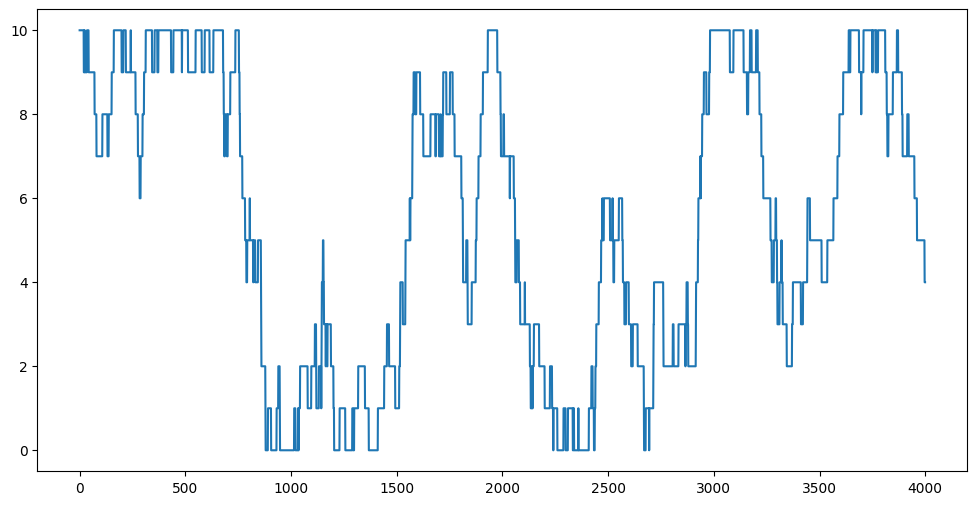

In [89]:
numOfSourcesHistory_df['NumOfSources'].plot(figsize=(12,6))


In [120]:
bandWidth_scaler = MinMaxScaler()
numOfSources_scaler = MinMaxScaler()

In [121]:
bandWidth_scaler.fit(maxBandwidthHistory_df[['MaxBandwidth']])
maxBandwidthHistory_scaled_train = bandWidth_scaler.transform(maxBandwidthHistory_df[['MaxBandwidth']])

numOfSources_scaler.fit(numOfSourcesHistory_df[['NumOfSources']])
numOfSourcesHistory_scaled_train = numOfSources_scaler.transform(numOfSourcesHistory_df[['NumOfSources']])


In [122]:
maxBandwidthHistory_scaled_train[:10],numOfSourcesHistory_scaled_train[:10]

(array([[0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486],
        [0.20040486]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [123]:
from keras.utils import timeseries_dataset_from_array

In [124]:
seqLen = 64
maxBandwidthBatchedDataset = timeseries_dataset_from_array(
    maxBandwidthHistory_scaled_train[0:-seqLen], 
    maxBandwidthHistory_scaled_train[seqLen:], 
    sequence_length=seqLen, 
    sampling_rate=1, 
    batch_size=1)
numOfSourceBatchedDataset = timeseries_dataset_from_array(
    numOfSourcesHistory_scaled_train[0:-seqLen], 
    numOfSourcesHistory_scaled_train[seqLen:], 
    sequence_length=seqLen, 
    sampling_rate=1, 
    batch_size=1)

In [94]:
example = list(numOfSourceBatchedDataset.as_numpy_iterator())
example[100]



(array([[[0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.7],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.8],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
         [0.9],
        

In [125]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [126]:
# define model
bandWidthModel = Sequential()
bandWidthModel.add(LSTM(128, activation='relu', input_shape=(seqLen, 1)))
bandWidthModel.add(Dense(1))
bandWidthModel.compile(optimizer='adam', loss='mse')

numOfSourcesModel = Sequential()
numOfSourcesModel.add(LSTM(128, activation='relu', input_shape=(seqLen, 1)))
numOfSourcesModel.add(Dense(1))
numOfSourcesModel.compile(optimizer='adam', loss='mse')

In [128]:
# fit model
bandWidthModel.fit(maxBandwidthBatchedDataset,epochs=25)

Epoch 1/25
3873/3873 [==============================] - 53s 14ms/step - loss: 0.0081
Epoch 2/25
3873/3873 [==============================] - 50s 13ms/step - loss: 0.0081
Epoch 3/25
3873/3873 [==============================] - 50s 13ms/step - loss: 0.0081
Epoch 4/25
3873/3873 [==============================] - 50s 13ms/step - loss: 0.0081
Epoch 5/25
3873/3873 [==============================] - 51s 13ms/step - loss: 0.0081
Epoch 6/25
3873/3873 [==============================] - 50s 13ms/step - loss: 0.0081
Epoch 7/25
3873/3873 [==============================] - 54s 14ms/step - loss: 0.0082
Epoch 8/25
3873/3873 [==============================] - 57s 15ms/step - loss: 0.0079
Epoch 9/25
3873/3873 [==============================] - 54s 14ms/step - loss: 0.0080
Epoch 10/25
3873/3873 [==============================] - 56s 15ms/step - loss: 0.0080
Epoch 11/25
3873/3873 [==============================] - 55s 14ms/step - loss: 0.0082
Epoch 12/25
3873/3873 [==============================] - 65s 17

In [129]:
if not os.path.exists('models'):
    os.makedirs('models')

# Save bandWidthModel
bandWidthModel.save('models/bandWidthModel.h5')

/Users/lenson/Documents/GitHub/NTU/SC4052-CloudComputing/.conda/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
numOfSourcesModel.fit(numOfSourceBatchedDataset,epochs=25)

Epoch 1/25
3873/3873 [==============================] - 59s 15ms/step - loss: 0.0051
Epoch 2/25
3873/3873 [==============================] - 52s 13ms/step - loss: 0.0024
Epoch 3/25
3873/3873 [==============================] - 53s 14ms/step - loss: 0.0015
Epoch 4/25
3873/3873 [==============================] - 52s 13ms/step - loss: 0.0011
Epoch 5/25
3873/3873 [==============================] - 52s 13ms/step - loss: 0.0010
Epoch 6/25
3873/3873 [==============================] - 52s 13ms/step - loss: 0.0011
Epoch 7/25
3873/3873 [==============================] - 52s 13ms/step - loss: 9.8485e-04
Epoch 8/25
3873/3873 [==============================] - 52s 13ms/step - loss: 9.2948e-04
Epoch 9/25
3873/3873 [==============================] - 52s 13ms/step - loss: 9.5242e-04
Epoch 10/25
3873/3873 [==============================] - 52s 13ms/step - loss: 9.4827e-04
Epoch 11/25
3873/3873 [==============================] - 52s 13ms/step - loss: 9.4311e-04
Epoch 12/25
3873/3873 [====================

In [131]:
# Save bandWidthModel
numOfSourcesModel.save('models/numOfSourcesModel.h5')

In [134]:
test_predictions = []

first_eval_batch = bandWidth_scaler.transform([[300] for _ in range(32)] + [[400] for _ in range(32)])
current_batch = first_eval_batch.reshape((1, 64, 1))
for i in range(10):
    
    # get the prediction value for the first batch
    current_pred = bandWidthModel.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred) 

    # use the prediction to update the batch and remove the first value
    actual = first_eval_batch[i]
    formatActual = actual.reshape((1, 1, 1))
    current_batch = np.append(current_batch[:,1:,:],formatActual,axis=1)

1/1 [==============================] - 0s 142ms/step


/Users/lenson/Documents/GitHub/NTU/SC4052-CloudComputing/.conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 15ms/step


In [135]:
results = []
for _ in range(10):
    results.append(bandWidth_scaler.inverse_transform(test_predictions))
results

[array([[440.17247641],
        [345.16183782],
        [332.45056319],
        [333.68980205],
        [334.50486064],
        [335.17949748],
        [335.86025882],
        [336.50094593],
        [337.08268476],
        [337.595788  ]]),
 array([[440.17247641],
        [345.16183782],
        [332.45056319],
        [333.68980205],
        [334.50486064],
        [335.17949748],
        [335.86025882],
        [336.50094593],
        [337.08268476],
        [337.595788  ]]),
 array([[440.17247641],
        [345.16183782],
        [332.45056319],
        [333.68980205],
        [334.50486064],
        [335.17949748],
        [335.86025882],
        [336.50094593],
        [337.08268476],
        [337.595788  ]]),
 array([[440.17247641],
        [345.16183782],
        [332.45056319],
        [333.68980205],
        [334.50486064],
        [335.17949748],
        [335.86025882],
        [336.50094593],
        [337.08268476],
        [337.595788  ]]),
 array([[440.17247641],
        

In [136]:
test_predictions

[array([0.4434944], dtype=float32),
 array([0.3473298], dtype=float32),
 array([0.33446413], dtype=float32),
 array([0.33571842], dtype=float32),
 array([0.33654338], dtype=float32),
 array([0.3372262], dtype=float32),
 array([0.33791524], dtype=float32),
 array([0.3385637], dtype=float32),
 array([0.33915251], dtype=float32),
 array([0.33967185], dtype=float32)]